In [1]:
# Here importing (Accessing) machine learning toolkits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Normalizing numerical data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Here extracting and reading dataset (DataFrame)
df = pd.read_csv('cybersecurity_attacks.csv')

In [3]:
# Here we can see all records columns
print(df)

                 Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP            503        Dat

In [4]:
# Transposing your data
print(df.T)

                                                                    0      \
Timestamp                                             2023-05-30 06:33:58   
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Source Port                                                         31225   
Destination Port                                                    17616   
Protocol                                                             ICMP   
Packet Length                                                         503   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                      28.67   

In [5]:
# Here using shape to get total records and total columns
print(df.shape)

(40000, 25)


In [6]:
# Here using len() function to find total length of records in dataset
print(len(df))

40000


In [7]:
# size is used to get total number of elements (records) 
print(df.size)

1000000


In [8]:
# Here using info() for get the details of dataset fields (columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [9]:
# Here using head function for display first 5 records
print(df.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [10]:
# Here using head function to display first 20 records
print(df.head(20))

              Timestamp Source IP Address Destination IP Address  Source Port  \
0   2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1   2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2   2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3   2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4   2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   
5   2022-10-28 13:14:27     198.102.5.160        147.190.155.133        17430   
6   2022-05-16 17:55:43     97.253.103.59           77.16.101.53        26562   
7   2023-02-12 07:13:17      11.48.99.245         178.157.14.116        34489   
8   2023-06-27 11:02:56     49.32.208.167           72.202.237.9        56296   
9   2021-08-15 22:29:04   114.109.149.113         160.88.194.172        37918   
10  2022-07-20 13:28:50     177.21.83.200        196.218.124.169        35538   
11  2022-06-26 15:15:50     

In [11]:
# Here using slice for display 50 to 100 Records 
print(df[50:101])

               Timestamp Source IP Address Destination IP Address  \
50   2023-01-18 01:12:24     122.130.86.58          110.54.165.63   
51   2021-04-16 12:48:40       193.45.37.6           191.56.96.54   
52   2022-04-28 14:18:26     68.123.14.202          168.106.24.90   
53   2023-02-20 06:41:55      19.14.168.54          68.144.93.235   
54   2020-12-13 02:43:04   168.159.245.149         211.64.146.125   
55   2022-08-20 07:46:57       22.96.76.59           43.219.176.9   
56   2022-05-23 04:50:39     163.93.76.114         36.148.218.135   
57   2020-01-12 11:01:33    37.225.176.201        204.179.190.185   
58   2021-03-24 09:50:44    123.233.44.106         154.223.194.82   
59   2020-01-12 19:33:29    158.145.58.183         82.213.128.111   
60   2021-10-08 21:42:19    193.109.94.146           189.14.24.22   
61   2022-08-17 19:20:40   122.108.169.214          7.195.147.252   
62   2022-08-17 02:04:53      64.58.36.254        179.161.134.184   
63   2020-03-10 04:31:21    61.217

In [12]:
# Here using tail function to display last 5 records
print(df.tail())

                 Timestamp Source IP Address Destination IP Address  \
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type                                       Payload Data  ...  \
39995         HTTP  Quibusdam ullam co

In [13]:
# Here display last 20 records
print(df.tail(20))

                 Timestamp Source IP Address Destination IP Address  \
39980  2021-07-01 19:09:43   113.228.203.251             9.92.96.13   
39981  2021-09-15 01:03:48    188.133.58.141           25.179.17.77   
39982  2020-10-24 19:32:43     24.150.253.66         163.192.200.17   
39983  2020-05-13 05:08:25      138.156.5.40          91.54.135.213   
39984  2023-09-16 07:57:45   168.119.246.120          106.225.9.156   
39985  2022-04-08 08:44:40        66.33.24.5        160.140.249.175   
39986  2023-01-09 02:03:32      45.144.27.57            29.82.15.40   
39987  2022-11-05 11:34:58     19.154.37.195        163.191.169.236   
39988  2021-02-09 03:53:42     160.10.82.152          1.179.113.201   
39989  2020-02-25 12:10:40     109.15.148.90         136.251.191.39   
39990  2022-03-17 12:32:16    149.46.211.219           62.75.28.249   
39991  2020-11-14 05:41:54    66.200.132.243           88.211.51.78   
39992  2021-08-13 18:57:13    163.227.253.64          98.219.251.81   
39993 

In [14]:
# Here using columns to get all name of columns from dataset
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [15]:
# Here using value to get all values from dataset
print(df. values)

[['2023-05-30 06:33:58' '103.216.15.12' '84.9.164.252' ... 'Log Data' nan
  'Server']
 ['2020-08-26 07:08:30' '78.199.217.198' '66.191.137.154' ... 'Log Data'
  nan 'Firewall']
 ['2022-11-13 08:23:25' '63.79.210.48' '198.219.82.17' ... 'Log Data'
  'Alert Data' 'Firewall']
 ...
 ['2022-03-31 01:45:49' '162.35.217.57' '98.107.0.15' ... 'Log Data'
  'Alert Data' 'Server']
 ['2023-09-22 18:32:38' '208.72.233.205' '173.79.112.252' ... 'Log Data'
  nan 'Server']
 ['2023-10-10 11:59:52' '14.102.21.108' '109.198.45.7' ... 'Log Data'
  'Alert Data' 'Firewall']]


In [16]:
# Here using index. We can get starting, ending indexes with default 1 step  
print(df.index)

RangeIndex(start=0, stop=40000, step=1)


In [17]:
# Here using dtype to check data types in dataset's columns
print(df.dtypes)

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [18]:
# Here using describe() function. describe () show statistic summary of your data. generate descriptive statistics (for numeric columns only)
print(df.describe())

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


In [19]:
# Here finding max number of a particular column
print(df['Source Port'].max())

65530


In [20]:
# Here finding min number of a particular column
print(df['Anomaly Scores'].min())

0.0


In [21]:
# Here count total number of a particular column
print(df['Packet Length'].count())

40000


In [22]:
# Here finding Average of a particular column
print(df['Destination Port'].mean())

33150.86865


In [23]:
# check Nan and missing values in dataset
null_values = df.isnull() # df.isna() # df.isnull().any
print(null_values)

       Timestamp  Source IP Address  Destination IP Address  Source Port  \
0          False              False                   False        False   
1          False              False                   False        False   
2          False              False                   False        False   
3          False              False                   False        False   
4          False              False                   False        False   
...          ...                ...                     ...          ...   
39995      False              False                   False        False   
39996      False              False                   False        False   
39997      False              False                   False        False   
39998      False              False                   False        False   
39999      False              False                   False        False   

       Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
0       

In [24]:
# Here checking total null values in every column
null_values = df.isnull().sum() # df.isna() # df.isnull().any
print(null_values)

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [25]:
# Here keeping all null values columns
# df['Malware Indicators','Alerts/Warnings','Proxy Information','Firewall Logs','IDS/IPS Alerts']

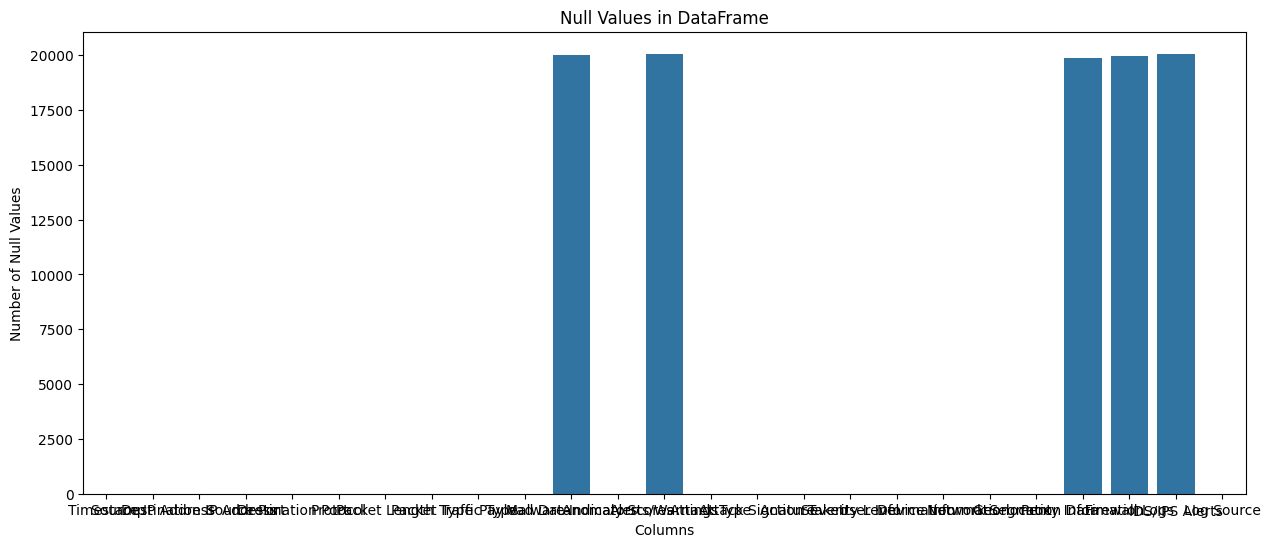

In [26]:
# Here Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

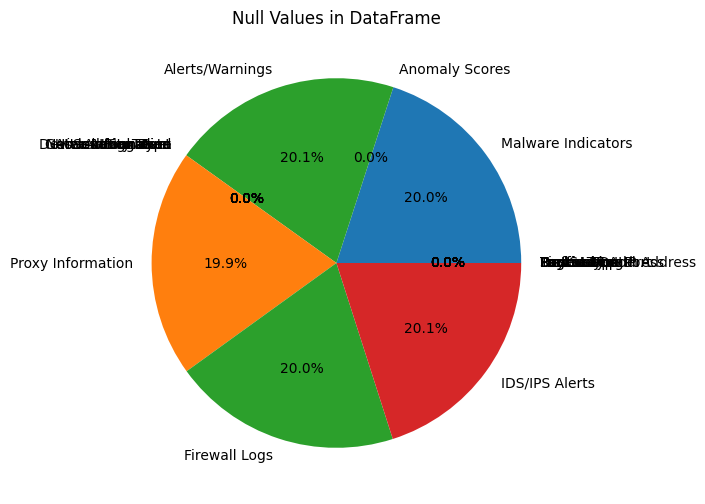

In [27]:
# Here using Pie Chart:

plt.figure(figsize=(15, 6))
plt.pie(null_values.values, labels=null_values.index, autopct='%1.1f%%')
plt.title('Null Values in DataFrame')
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

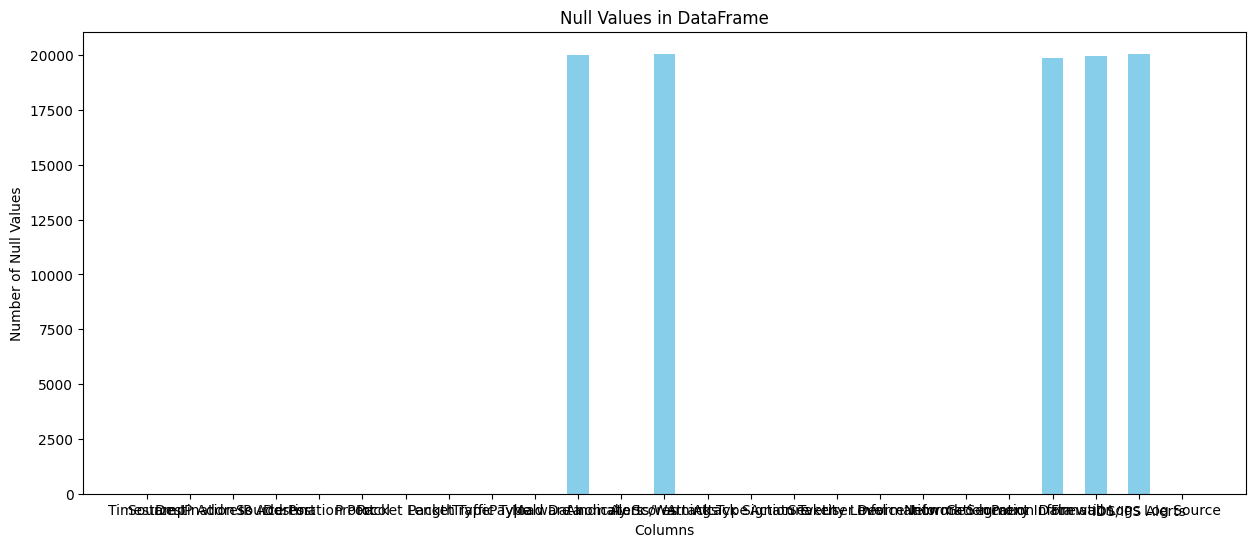

In [28]:
# Stacked Bar Plot:

plt.figure(figsize=(15, 6))
plt.bar(null_values.index, null_values.values, width=0.5, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

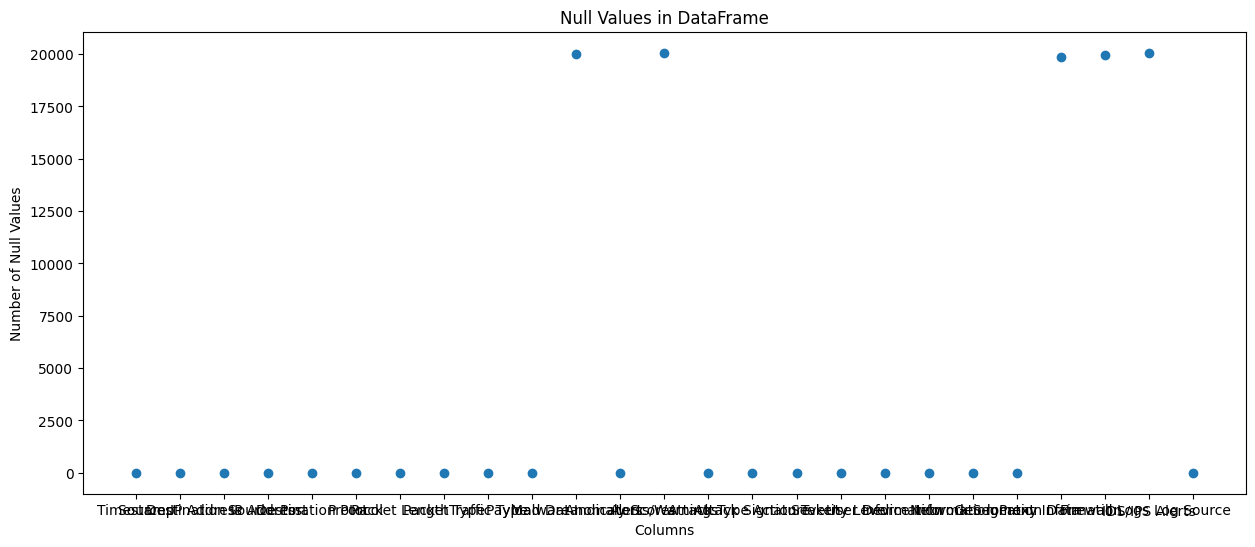

In [29]:
# Scatter Plot:

plt.figure(figsize=(15, 6))
plt.scatter(null_values.index, null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

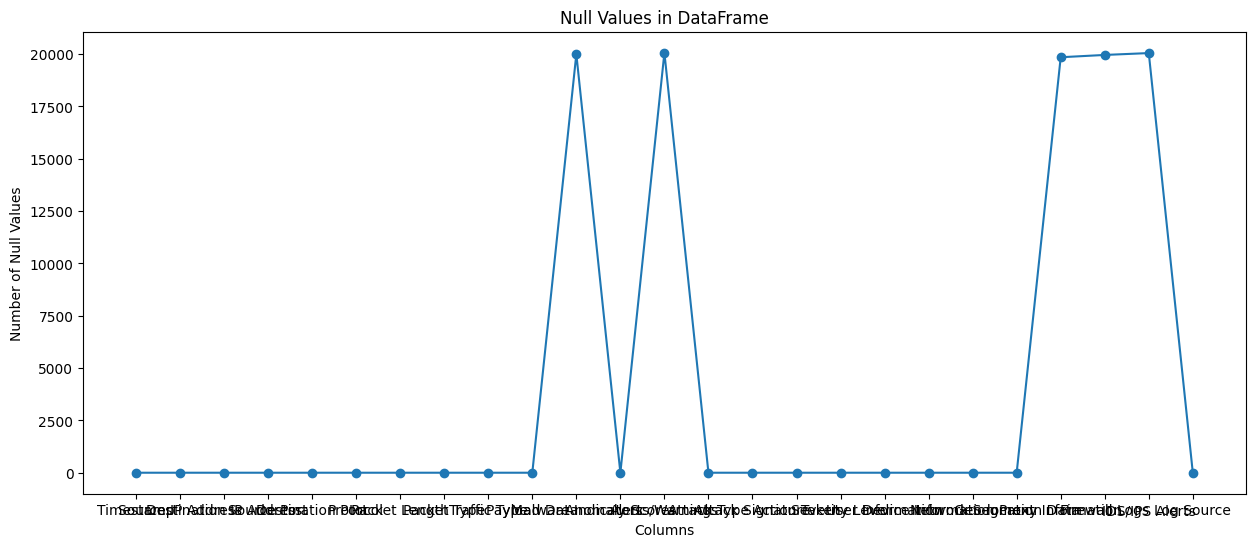

In [30]:
# Line Plot  # Same output using line plot graph
plt.figure(figsize=(15, 6))
plt.plot(null_values.index, null_values.values, marker='o')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.show()

In [31]:
# Here using notnull() function to get not null data if get notnull data then display True
not_null_values = df.notnull()
print(not_null_values)

       Timestamp  Source IP Address  Destination IP Address  Source Port  \
0           True               True                    True         True   
1           True               True                    True         True   
2           True               True                    True         True   
3           True               True                    True         True   
4           True               True                    True         True   
...          ...                ...                     ...          ...   
39995       True               True                    True         True   
39996       True               True                    True         True   
39997       True               True                    True         True   
39998       True               True                    True         True   
39999       True               True                    True         True   

       Destination Port  Protocol  Packet Length  Packet Type  Traffic Type  \
0       

In [32]:
# Here checking total null or not null values in every columns 
not_null_values = df.notnull().sum()
print(not_null_values)

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64


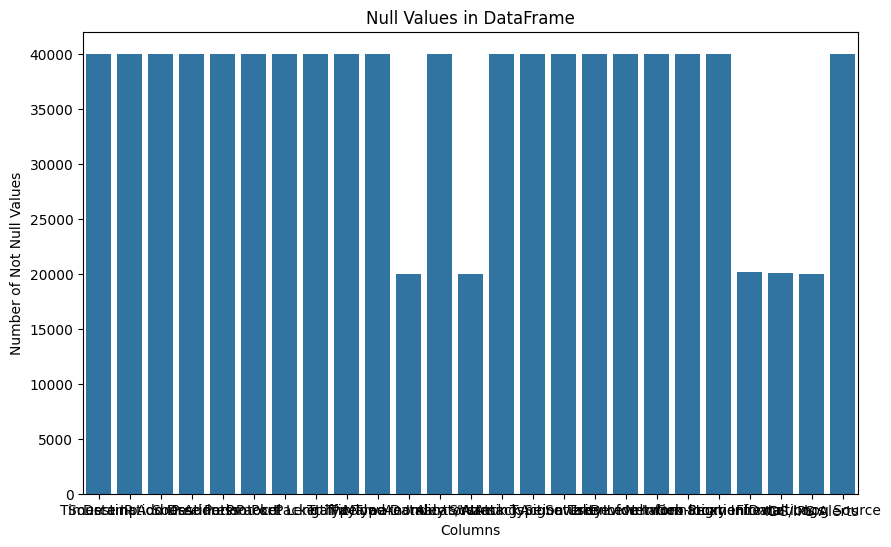

In [33]:
# Here Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=not_null_values.index, y=not_null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Not Null Values')
plt.title('Null Values in DataFrame')
plt.show() # Given Results x-axis represents the column names and the y-axis represents the number of null values

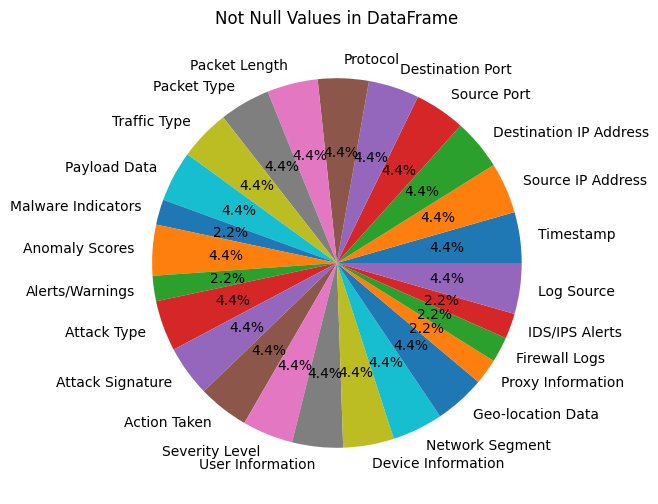

In [34]:
# Here Create a pie chart # same result in pie chart
plt.figure(figsize=(10, 6))
plt.pie(not_null_values.values, labels=not_null_values.index, autopct='%1.1f%%')
plt.title('Not Null Values in DataFrame')
plt.show()

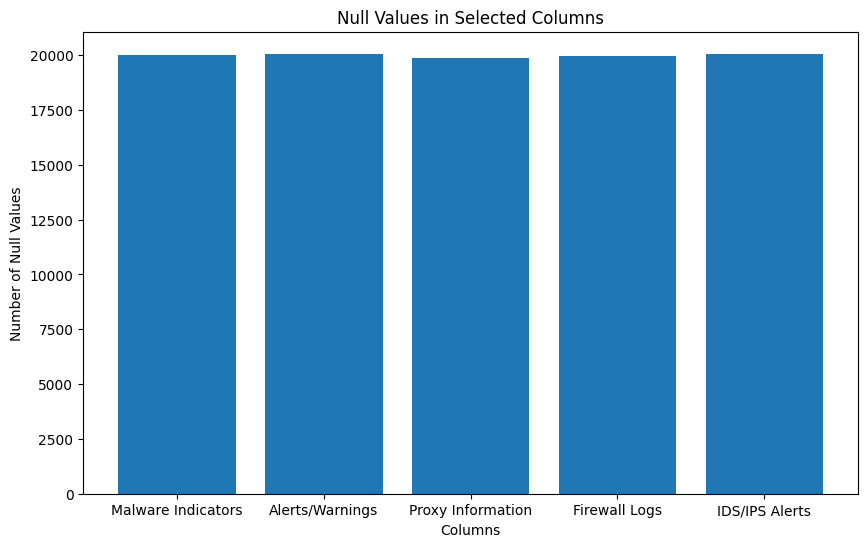

In [35]:
# Here all somes colums having null values like ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
# Using matplotlib
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(null_values.index, null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Selected Columns')
plt.show()

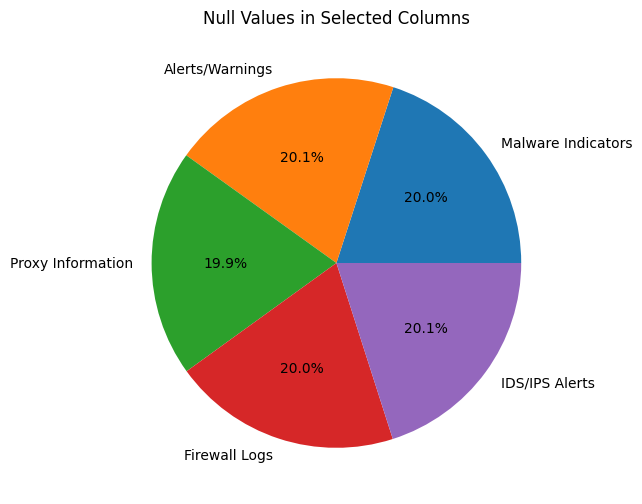

In [36]:
# Create pie chart # same output in pie chart
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(null_values.values, labels=null_values.index, autopct='%1.1f%%')
plt.title('Null Values in Selected Columns')
plt.show()

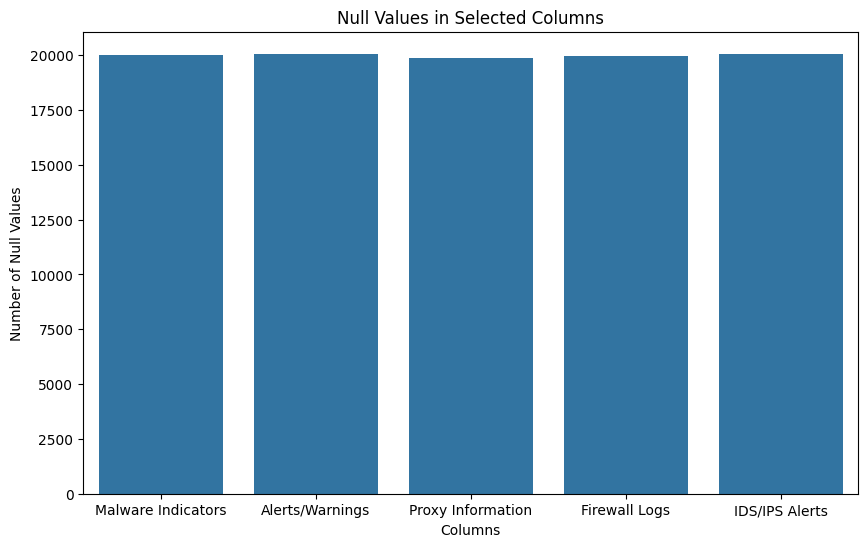

In [37]:
# Here all somes colums having null values like ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
# Using Seaborn
null_value_columns = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Calculate null values for the selected columns
null_values = df[null_value_columns].isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Selected Columns')
plt.show()


In [38]:
# Here checking total size of a particular column
print(df['Firewall Logs'].size)

40000


In [39]:
# Here checking total Nan and missing value a particular column
print(df['Firewall Logs'].isnull().sum())

19961


In [40]:
# Here checking total not values 
print(df['Firewall Logs'].notnull().sum())

20039


In [41]:
print(df['Firewall Logs'].value_counts())

Firewall Logs
Log Data    20039
Name: count, dtype: int64


In [42]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [43]:
# Here we can get any particular column
print(df['Firewall Logs'])

0        Log Data
1        Log Data
2        Log Data
3             NaN
4             NaN
           ...   
39995    Log Data
39996    Log Data
39997    Log Data
39998    Log Data
39999    Log Data
Name: Firewall Logs, Length: 40000, dtype: object


In [44]:
print(df['Firewall Logs'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        Log Data
1        Log Data
2        Log Data
3             NaN
4             NaN
           ...   
39995    Log Data
39996    Log Data
39997    Log Data
39998    Log Data
39999    Log Data
Name: Firewall Logs, Length: 40000, dtype: object>


In [45]:
print(df.size)

1000000


In [46]:
# Dropping unnecessary columns for the neural network model
columns_to_drop = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Payload Data', 
                   'User Information', 'Device Information', 'Geo-location Data', 'Log Source']
dataset_cleaned = df.drop(columns=columns_to_drop)
print(dataset_cleaned)

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP            503        Data   
1            17245             48166     ICMP           1174        Data   
2            16811             53600      UDP            306     Control   
3            20018             32534      UDP            385        Data   
4             6131             26646      TCP           1462        Data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type Malware Indicators  Anomaly Scores  Alerts/Warnings  \
0            

In [47]:
print(dataset_cleaned.shape)

(40000, 17)


In [48]:
print(dataset_cleaned.columns)

Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts'],
      dtype='object')


In [49]:
# Handling missing values
# Filling missing values in categorical columns with 'Unknown'
categorical_cols_with_na = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 
                            'Firewall Logs', 'IDS/IPS Alerts']
dataset_cleaned[categorical_cols_with_na] = dataset_cleaned[categorical_cols_with_na].fillna('Unknown')
print(dataset_cleaned)

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     ICMP            503        Data   
1            17245             48166     ICMP           1174        Data   
2            16811             53600      UDP            306     Control   
3            20018             32534      UDP            385        Data   
4             6131             26646      TCP           1462        Data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type Malware Indicators  Anomaly Scores  Alerts/Warnings  \
0            

In [50]:
print(dataset_cleaned.isnull().sum())

Source Port           0
Destination Port      0
Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Network Segment       0
Proxy Information     0
Firewall Logs         0
IDS/IPS Alerts        0
dtype: int64


In [51]:
# Calculate null values for each column 
null_values = dataset_cleaned.isnull().sum()
print(null_values)

Source Port           0
Destination Port      0
Protocol              0
Packet Length         0
Packet Type           0
Traffic Type          0
Malware Indicators    0
Anomaly Scores        0
Alerts/Warnings       0
Attack Type           0
Attack Signature      0
Action Taken          0
Severity Level        0
Network Segment       0
Proxy Information     0
Firewall Logs         0
IDS/IPS Alerts        0
dtype: int64


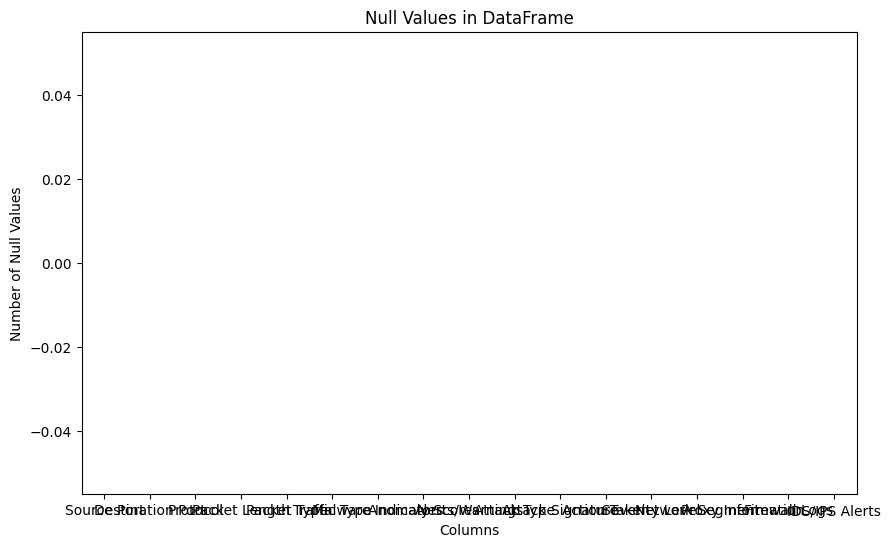

In [52]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in DataFrame')
plt.show() # Here show null value after cleaning missing values in graphs

In [53]:
# Calculate non-null values for each column
not_null_values = dataset_cleaned.notnull().sum()
print(not_null_values)

Source Port           40000
Destination Port      40000
Protocol              40000
Packet Length         40000
Packet Type           40000
Traffic Type          40000
Malware Indicators    40000
Anomaly Scores        40000
Alerts/Warnings       40000
Attack Type           40000
Attack Signature      40000
Action Taken          40000
Severity Level        40000
Network Segment       40000
Proxy Information     40000
Firewall Logs         40000
IDS/IPS Alerts        40000
dtype: int64


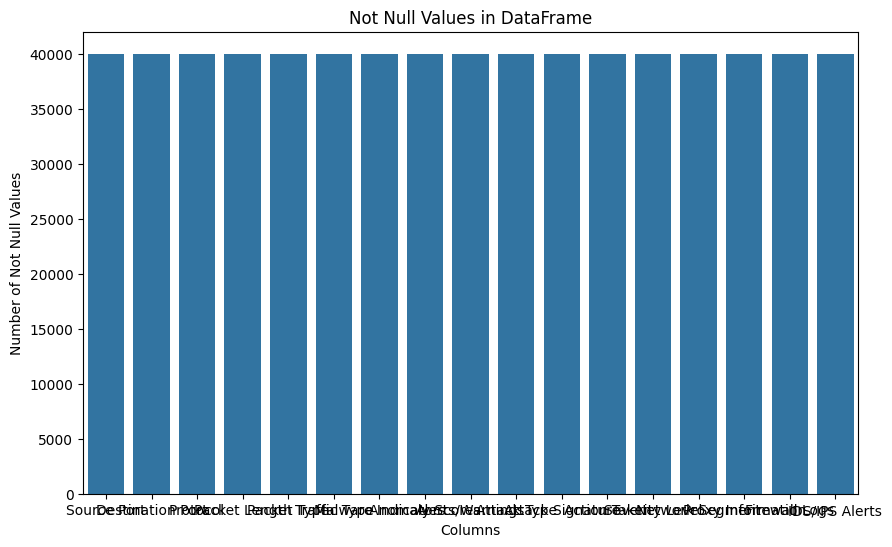

In [54]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=not_null_values.index, y=not_null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Not Null Values')
plt.title('Not Null Values in DataFrame')
plt.show()  # Here show not null value after cleaning missing values in bar plot graphs

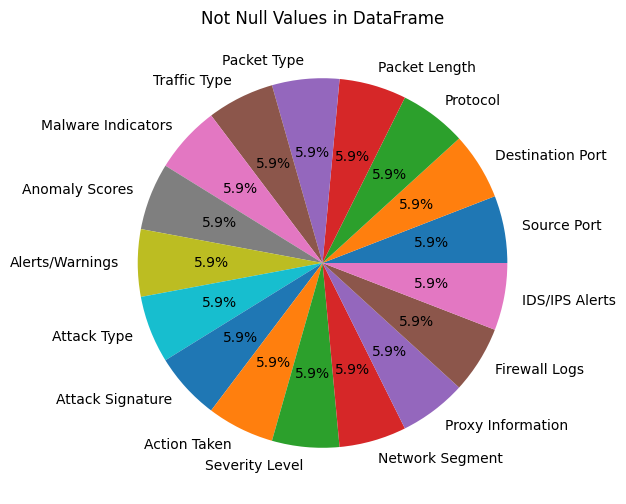

In [55]:
# Calculate non-null values for each column
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(not_null_values.values, labels=not_null_values.index, autopct='%1.1f%%')
plt.title('Not Null Values in DataFrame')
plt.show() # Here show not null value after cleaning missing values in pie chart graphs

In [56]:
# Encoding categorical variables
categorical_columns = dataset_cleaned.select_dtypes(include=['object']).columns
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=categorical_columns)
print(dataset_encoded)

       Source Port  Destination Port  Packet Length  Anomaly Scores  \
0            31225             17616            503           28.67   
1            17245             48166           1174           51.50   
2            16811             53600            306           87.42   
3            20018             32534            385           15.79   
4             6131             26646           1462            0.52   
...            ...               ...            ...             ...   
39995        31005              6764           1428           39.28   
39996         2553             28091           1184           27.25   
39997        22505             25152           1043           31.01   
39998        20013              2703            483           97.85   
39999        50137             55575           1175           34.63   

       Protocol_ICMP  Protocol_TCP  Protocol_UDP  Packet Type_Control  \
0               True         False         False                False   
1

In [57]:
# Normalizing numerical data
numerical_columns = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
scaler = StandardScaler()
dataset_encoded[numerical_columns] = scaler.fit_transform(dataset_encoded[numerical_columns])
print(dataset_encoded)

       Source Port  Destination Port  Packet Length  Anomaly Scores  \
0        -0.094038         -0.836357      -0.669295       -0.743191   
1        -0.847263          0.808376       0.943535        0.048054   
2        -0.870646          1.100929      -1.142808        1.292975   
3        -0.697857         -0.033211      -0.952922       -1.189588   
4        -1.446071         -0.350205       1.635778       -1.718818   
...            ...               ...            ...             ...   
39995    -0.105891         -1.420601       1.554055       -0.375468   
39996    -1.638849         -0.272410       0.967571       -0.792406   
39997    -0.563860         -0.430639       0.628660       -0.662091   
39998    -0.698126         -1.639235      -0.717367        1.654460   
39999     0.924917          1.207258       0.945938       -0.536629   

       Protocol_ICMP  Protocol_TCP  Protocol_UDP  Packet Type_Control  \
0               True         False         False                False   
1

In [63]:
# Display the shape of the cleaned and preprocessed dataset
print(dataset_encoded.shape)

(40000, 20183)


In [64]:
dataset_encoded.dtypes

Source Port                  float64
Destination Port             float64
Packet Length                float64
Anomaly Scores               float64
Protocol_ICMP                   bool
                              ...   
Proxy Information_Unknown       bool
Firewall Logs_Log Data          bool
Firewall Logs_Unknown           bool
IDS/IPS Alerts_Alert Data       bool
IDS/IPS Alerts_Unknown          bool
Length: 20183, dtype: object

In [65]:
print(dataset_encoded.columns)

Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores',
       'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'Packet Type_Control',
       'Packet Type_Data', 'Traffic Type_DNS',
       ...
       'Proxy Information_99.89.108.231', 'Proxy Information_99.89.194.35',
       'Proxy Information_99.92.150.46', 'Proxy Information_99.92.154.17',
       'Proxy Information_99.97.192.156', 'Proxy Information_Unknown',
       'Firewall Logs_Log Data', 'Firewall Logs_Unknown',
       'IDS/IPS Alerts_Alert Data', 'IDS/IPS Alerts_Unknown'],
      dtype='object', length=20183)


In [62]:
# # Define features (X) and target (y)
# # Replace 'Attack Type' with the actual target column
# target_column = 'Attack Type'
# X = dataset_encoded.drop(columns=[target_column])
# y = dataset_encoded[target_column]

KeyError: "['Attack Type'] not found in axis"